# IMAGE WATERSHED

The Watershed Algorithm is a region-based image segmentation technique that treats an image like a topographic surface where the pixel intensity represents elevation. the algorithm "floods" low-intensity regions, pregessively filling basins, and when water from different basins meets, it creates a boundary that segments the image. 

## KEY CONCEPTS: 

### GRADIENT AND TOPOGRAPHY:

* The image is viewd as a topographic surface where bright areas are high peaks and dark areas are valleys. The idea is for flood these valleys until different regions touch and create boundaries.

### MARKERS:

* You need to define markers, which are points are small regions that tell the algorithm where the objects (foreground) and the background are located. These markers act as seeds for the flooding process.

### FLOODING PROCESS:

* The algorithm begins flooding from the marker points (starting in the valleys) and works its way up until water from different regions meets. The meeting points form the boundaries that separate different objects.

### SEGMENTATION:

* When the regions flood and meet, the algorithm draws "watershed lines" that define the boundaries of the objects. These boundaries segment the image into different objects or regions.

## HOW WATERSHED WORKS:

### PREPROCESSING: 

* You first preprocess the image using techniques like blurring and edge detection to reduce noiseand enhance the regions.

### MARKER INITIALIZATION:

* You create markers to identify the objects of interest and the background. Markers are areas or pixels that are labeled with different interger values, where each value represents a different object or backgroundregion.

### FINAL SEGMENTATION:

* The final result is an image where the objects are separated by watershed lines, effectively segmenting different regions.

## WHEN DO YOU USE IT?

### THE WATERSHED ALGORITHM IS USED WHEN YOU WANT TO:

* Separate touching in an image (like fruits, cars, or cells in medical images).
* Final boundaries between objects in noisy or complex images.

# IMPORTING LIBRARIES

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# READING AN IMAGE

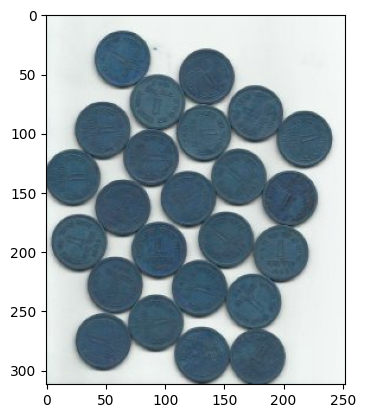

In [7]:
img = cv.imread('coins.jpg')
plt.imshow(img)
plt.show()

# CONVERTING TO GRAY SCALE

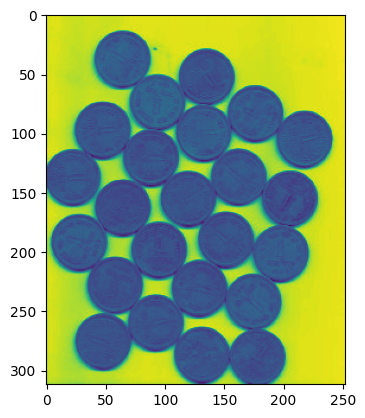

In [9]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

# APPLY THRESHOLDING TO SEPARATE THE BACKGROUD AND FOREGROUND

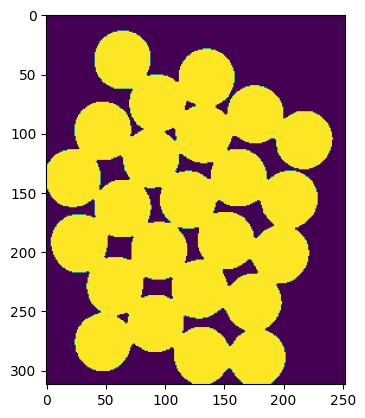

In [11]:
img1m = cv.medianBlur(gray,3)
ret, thresh = cv.threshold(img1m,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

# NOISE REMOVAL USING MORPHOLOGICAL OPERATIONS

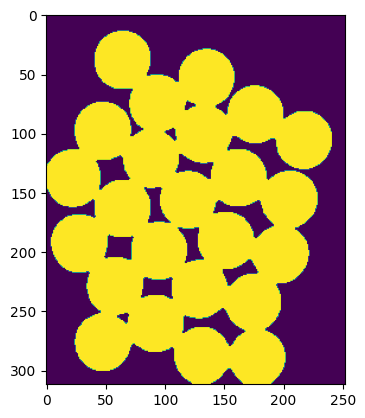

In [13]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening)
plt.show() 

# FIND SURE BACKGROUND BY DILATING THE IMAGE

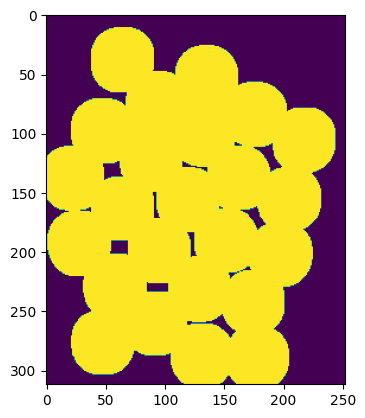

In [15]:
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg)
plt.show()

# FIND SURE FORGROUND BY USING DISTANCE TRANSFORM AND THERRESHOLDING 

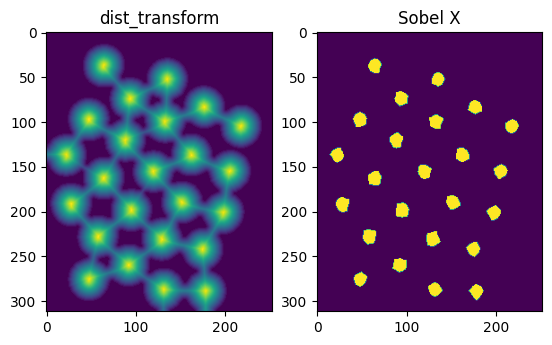

In [17]:
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
plt.subplot(1,2,1), plt.imshow(dist_transform)
plt.title('dist_transform'),

ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.subplot(1,2,2), plt.imshow(sure_fg)
plt.title('Sobel X')
plt.show()

# FINDING UNKNOWN REGION

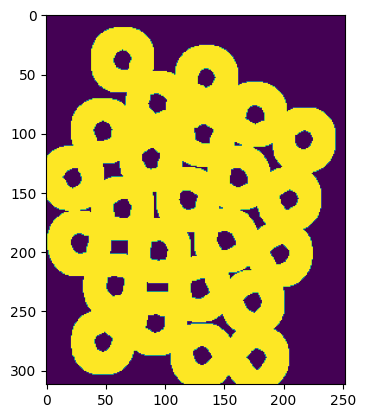

In [19]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.show()

# MARKER LABELING

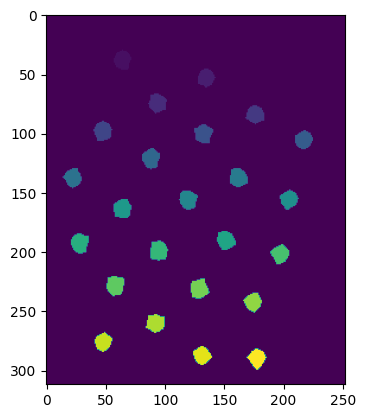

In [21]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

plt.imshow(markers)
plt.show()

# MARKING REGION OF UNKNOWN

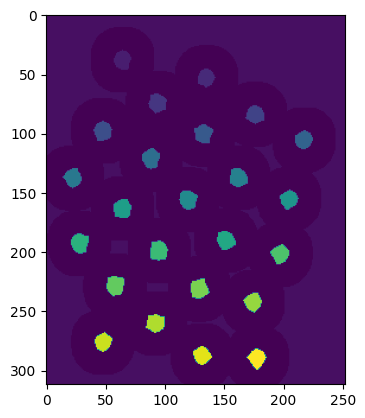

In [23]:
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

# APPLYING WATERSHED

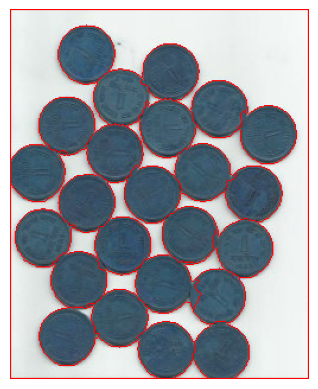

In [25]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)
plt.axis('off')
plt.show()